In [1]:
import glob
import skimage
import matplotlib.pyplot as plt
import numpy as np
import scipy
pngs = glob.glob('toyProblem_F22/frame_*.png')

## Problem 1 - Loading and displaying a toy problem:

> When images are read, it is read as (y,x) instead of (x,y). 

In [2]:
# make image list
ims_with_color = []
ims = []
for i in pngs:
    # read in image in grayscale
    ims_with_color.append(plt.imread(i))
    # read in image in grayscale
    ims.append(skimage.color.rgb2gray(plt.imread(i)))

# make image array
V = np.dstack(ims)
V.shape

(256, 256, 64)

In [3]:
# animation of images
# %matplotlib qt
# for im in ims:
#     plt.imshow(im, cmap='gray')
#     plt.pause(0.1)
# %matplotlib inline

## Problem 2.1 - Low level gradient calculation:

In [4]:
# Compute the gradient in x, y and t direction
Vy = V[1:, :, :] - V[0:-1, :, :]
Vx = V[:, 1:, :] - V[:, 0:-1, :]
Vt = V[:, :, 1:] - V[:, :, 0:-1]
Vx.shape, Vy.shape, Vt.shape

((256, 255, 64), (255, 256, 64), (256, 256, 63))

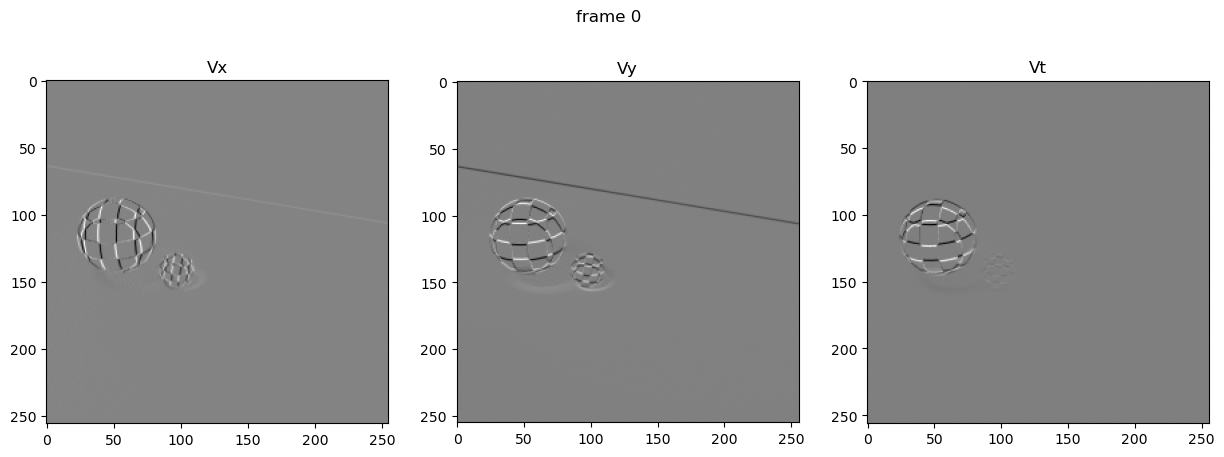

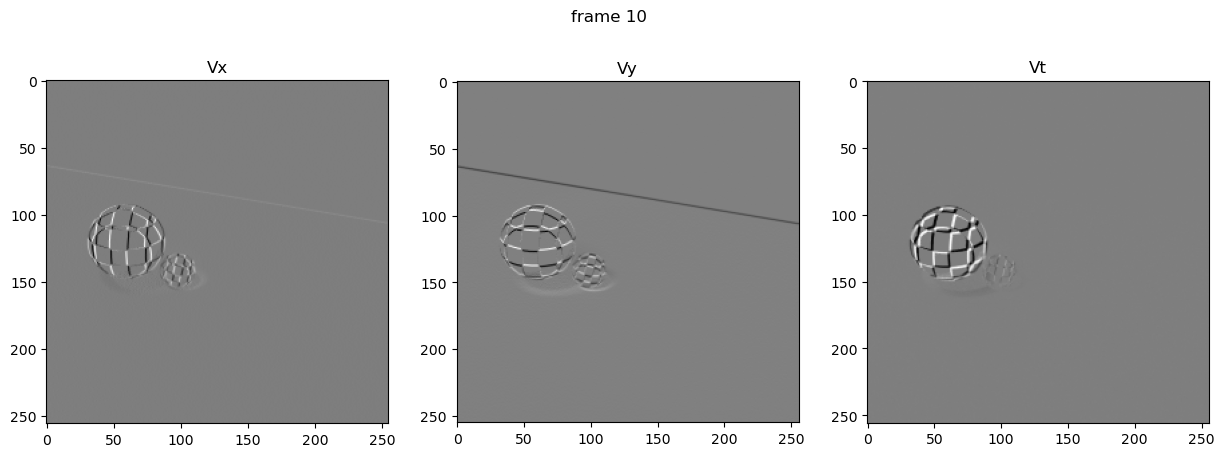

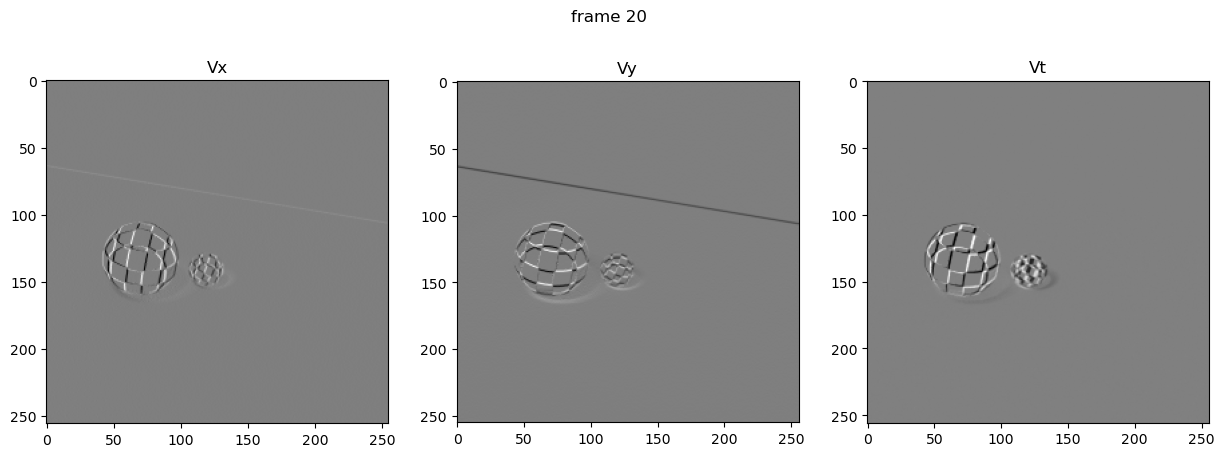

In [5]:
# Select some images
indexes = [0, 10, 20]

# Show gradient images
for i in indexes:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.title('frame {}'.format(i))
    ax[0].imshow(Vx[:, :, i], cmap='gray')
    ax[0].set_title('Vx')
    ax[1].imshow(Vy[:, :, i], cmap='gray')
    ax[1].set_title('Vy')
    ax[2].imshow(Vt[:, :, i], cmap='gray')
    ax[2].set_title('Vt')
    fig.suptitle('frame {}'.format(i))
    plt.show()

## Problem 2.2 - Simple Gradient Filters:

### The kernel

In [6]:
# Not sure actually...
prewitt_h_kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
prewitt_v_kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

prewitt_h_kernel, prewitt_v_kernel

(array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]),
 array([[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]]))

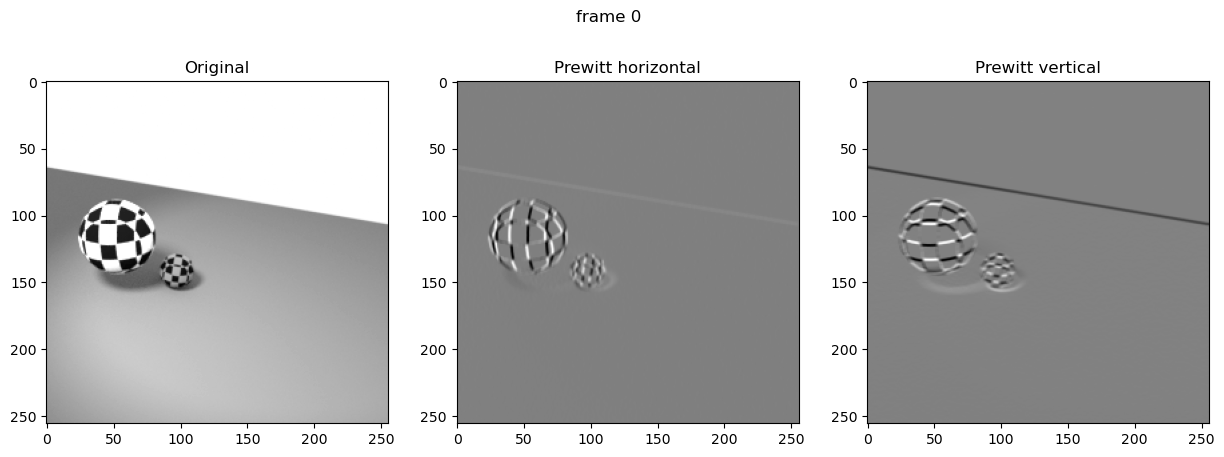

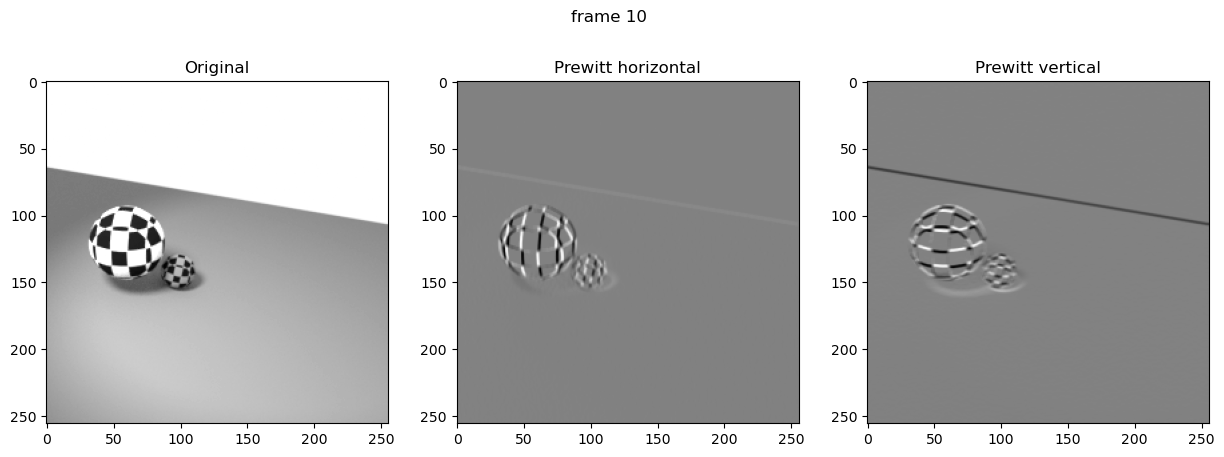

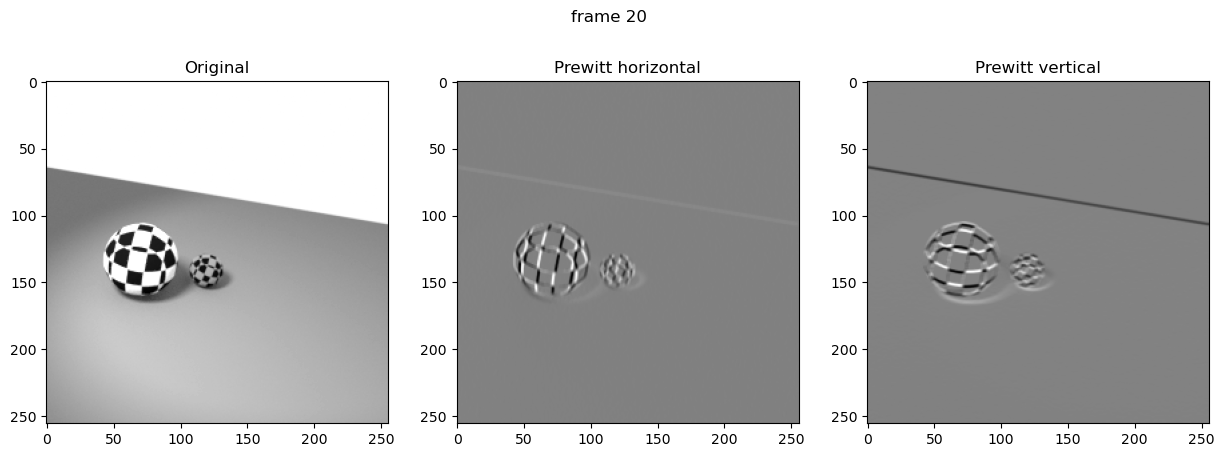

In [7]:
# Select some images
indexes = [0, 10, 20]

# Show gradient images
for i in indexes:    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.title('frame {}'.format(i))
    ax[0].imshow(ims[i], cmap='gray')
    ax[0].set_title('Original')
    ax[1].imshow(scipy.ndimage.prewitt(ims[i], axis=1), cmap='gray')
    ax[1].set_title('Prewitt horizontal')
    ax[2].imshow(scipy.ndimage.prewitt(ims[i], axis=0), cmap='gray')
    ax[2].set_title('Prewitt vertical')
    fig.suptitle('frame {}'.format(i))
    plt.show()

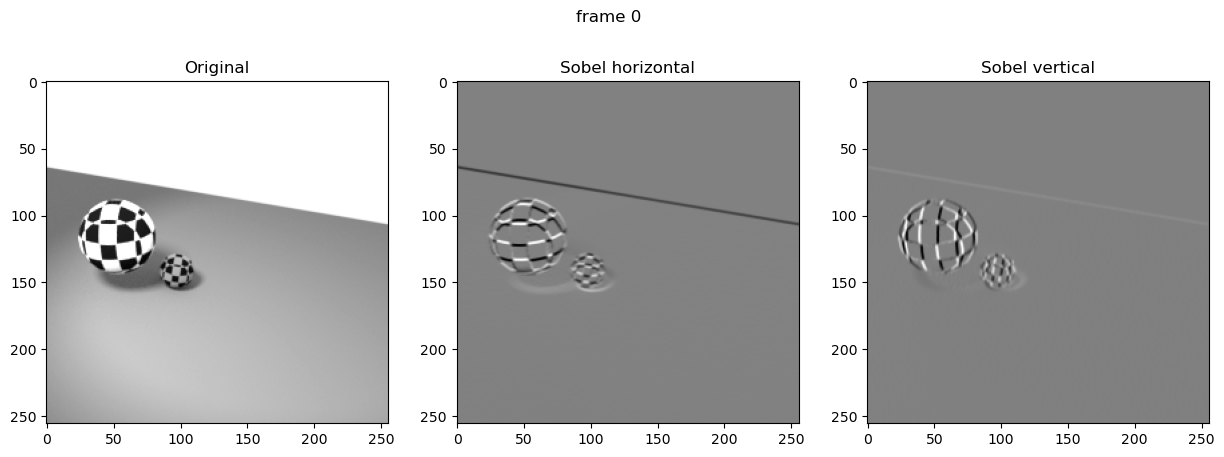

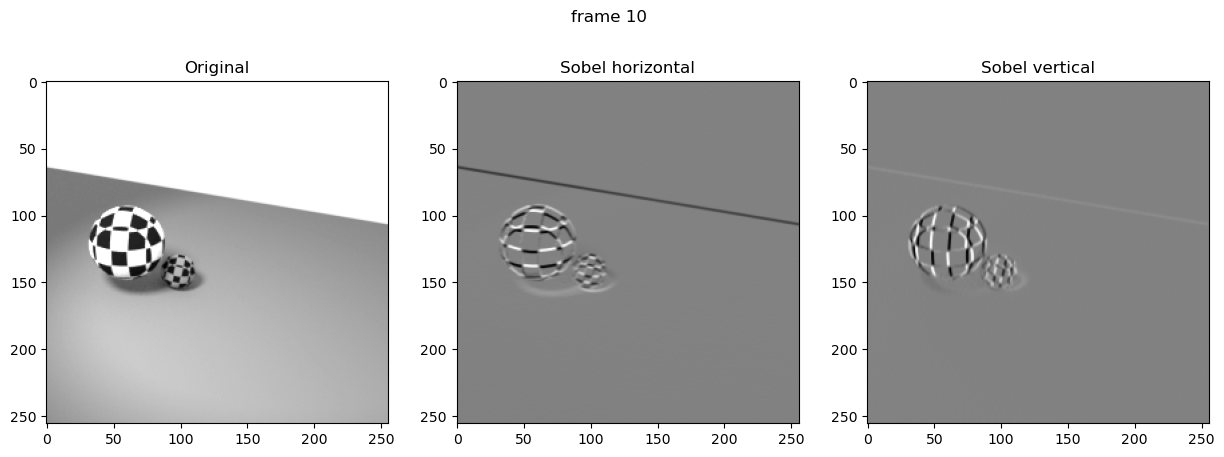

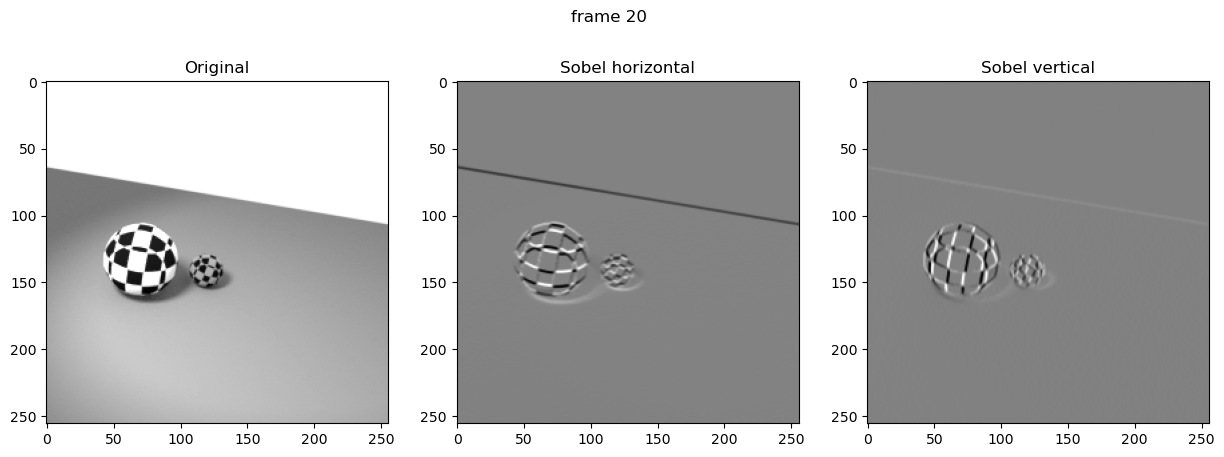

In [8]:
# default is axis=-1 meaning the last axis

# Select some images
indexes = [0, 10, 20]

# Show gradient images
for i in indexes:    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.title('frame {}'.format(i))
    ax[0].imshow(ims[i], cmap='gray')
    ax[0].set_title('Original')
    ax[1].imshow(scipy.ndimage.sobel(ims[i], axis=0), cmap='gray')
    ax[1].set_title('Sobel horizontal')
    ax[2].imshow(scipy.ndimage.sobel(ims[i], axis=1), cmap='gray')
    ax[2].set_title('Sobel vertical')
    fig.suptitle('frame {}'.format(i))
    plt.show()

In [9]:
# Not sure actually...
sobel_h_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
sobel_v_kernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

Both give vertical gradient.

### Image filtering:

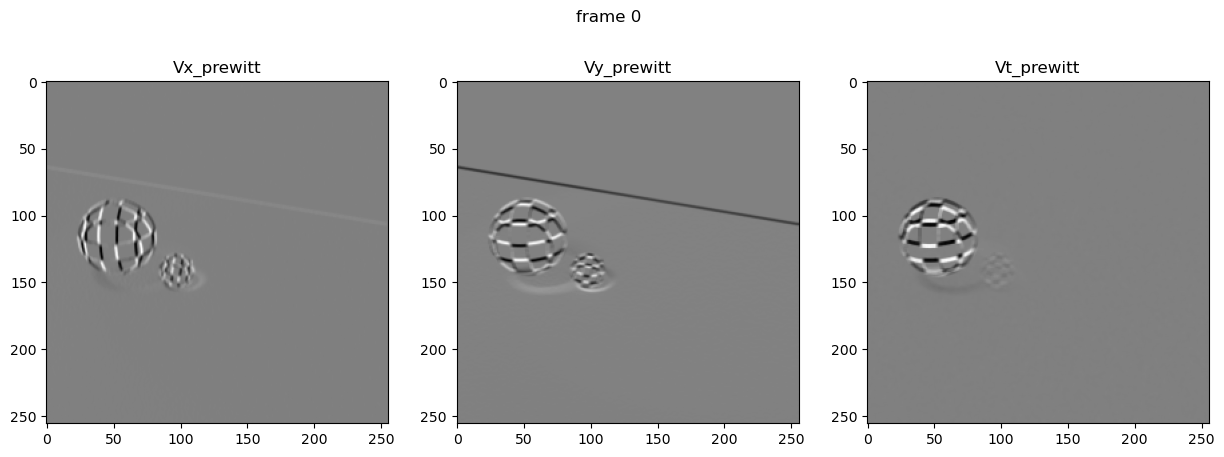

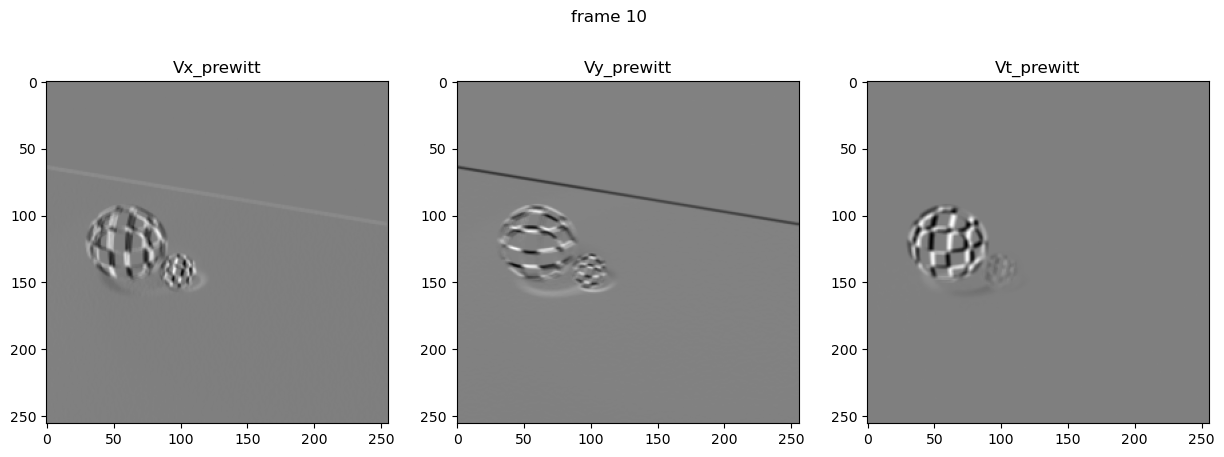

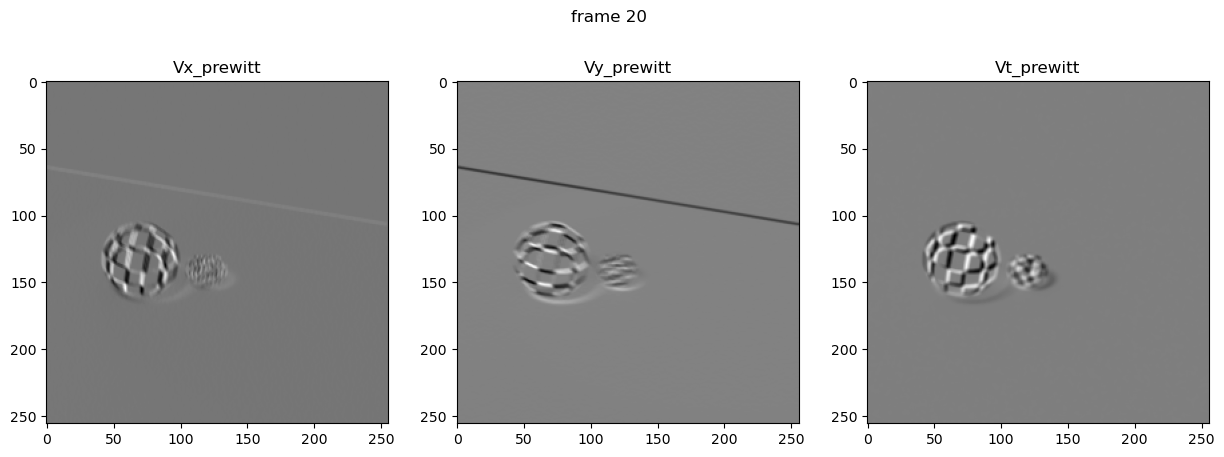

In [10]:
Vx_prewitt = scipy.ndimage.prewitt(V, axis=1)
Vy_prewitt = scipy.ndimage.prewitt(V, axis=0)
Vt_prewitt = scipy.ndimage.prewitt(V, axis=2)
for i in indexes:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.title('frame {}'.format(i))
    ax[0].imshow(Vx_prewitt[:, :, i], cmap='gray')
    ax[0].set_title('Vx_prewitt')
    ax[1].imshow(Vy_prewitt[:, :, i], cmap='gray')
    ax[1].set_title('Vy_prewitt')
    ax[2].imshow(Vt_prewitt[:, :, i], cmap='gray')
    ax[2].set_title('Vt_prewitt')
    fig.suptitle('frame {}'.format(i))
    plt.show()

## Problem 2.3 - Gaussian Gradient Filters:

$$
G(x,y,z) = \frac{1}{(2 \pi \sigma^{2})^\frac{3}{2}}e^{- \frac{x^{2}+y^{2}+z^{2}}{2\sigma^{2}} }
$$

In [11]:
# from sympy import *
# init_printing()
# x, y, z, sigma = symbols('x y z sigma')
# # gaussian
# G_xy = exp(-(x**2 + y**2)/(2*sigma**2)) / (2*pi*sigma**2)
# #diff(G_xy,x)
# G_xyz = exp(-(x**2 + y**2 + z**2)/(2*sigma**2)) / (2*pi*sigma**2)**(S(3)/2)
# G_xyz, diff(G_xyz,x), diff(G_xyz,y), diff(G_xyz,z)

In [12]:
# Gaussian filter
sigma = 1
gaussian_V = scipy.ndimage.gaussian_filter(V, sigma, order=1)
%matplotlib qt
# for i in range(gaussian_V.shape[2]):
#     plt.imshow(gaussian_V[:,:,i], cmap='gray')
#     plt.pause(0.1)
%matplotlib inline
Vx_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=1)
Vy_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=0)
Vt_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=2)
Vx_gaussian.shape, Vy_gaussian.shape, Vt_gaussian.shape

((256, 256, 64), (256, 256, 64), (256, 256, 64))

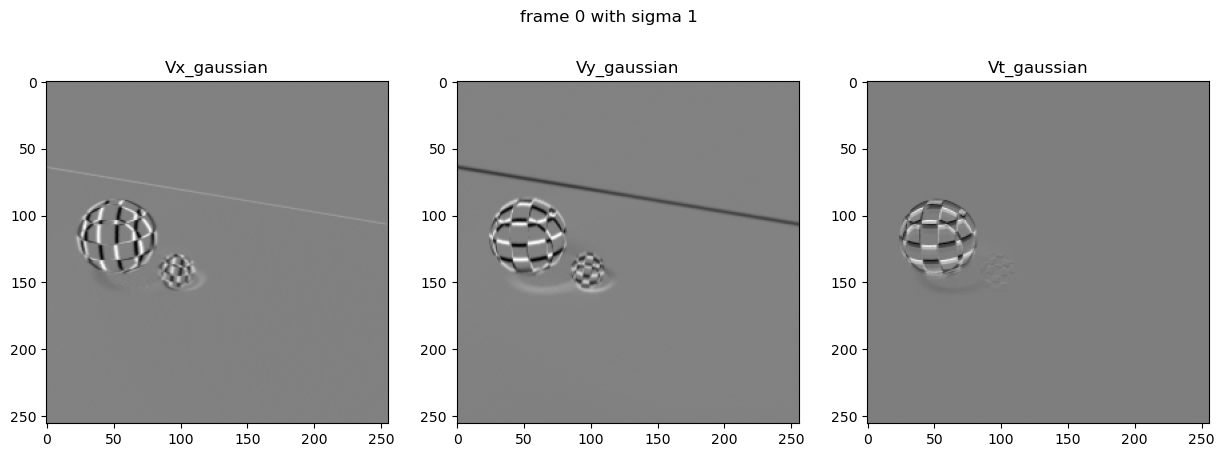

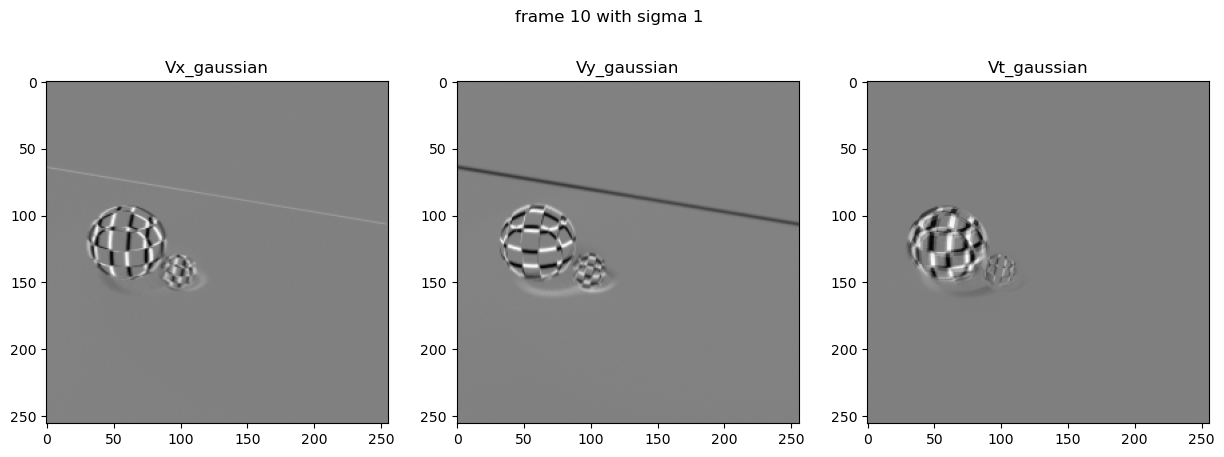

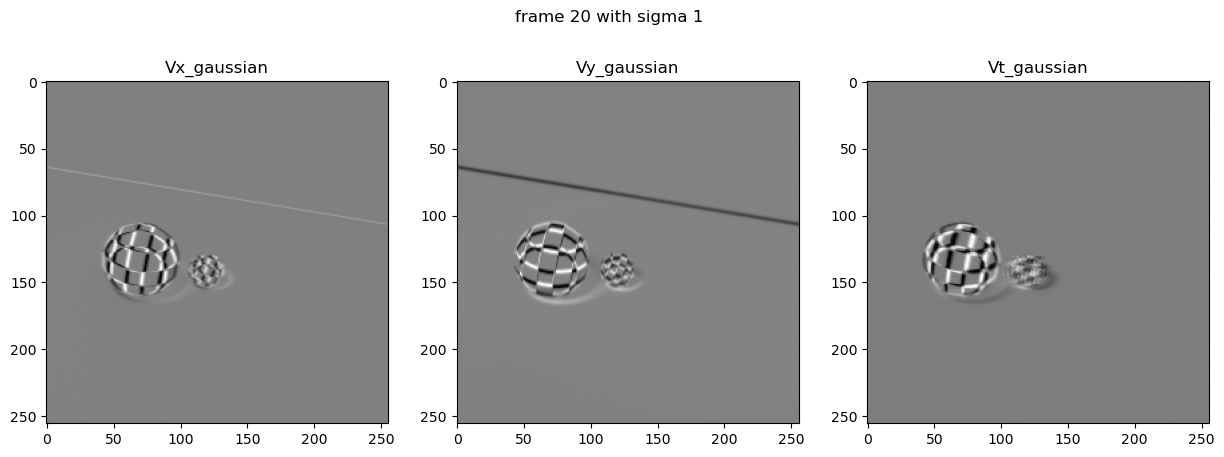

In [13]:
# Select some images
indexes = [0,10,20]
sigma = 1

for i in indexes:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.title('frame {}'.format(i))
    ax[0].imshow(Vx_gaussian[:, :, i], cmap='gray')
    ax[0].set_title('Vx_gaussian')
    ax[1].imshow(Vy_gaussian[:, :, i], cmap='gray')
    ax[1].set_title('Vy_gaussian')
    ax[2].imshow(Vt_gaussian[:, :, i], cmap='gray')
    ax[2].set_title('Vt_gaussian')
    fig.suptitle('frame {} with sigma {}'.format(i, sigma))
    plt.show()

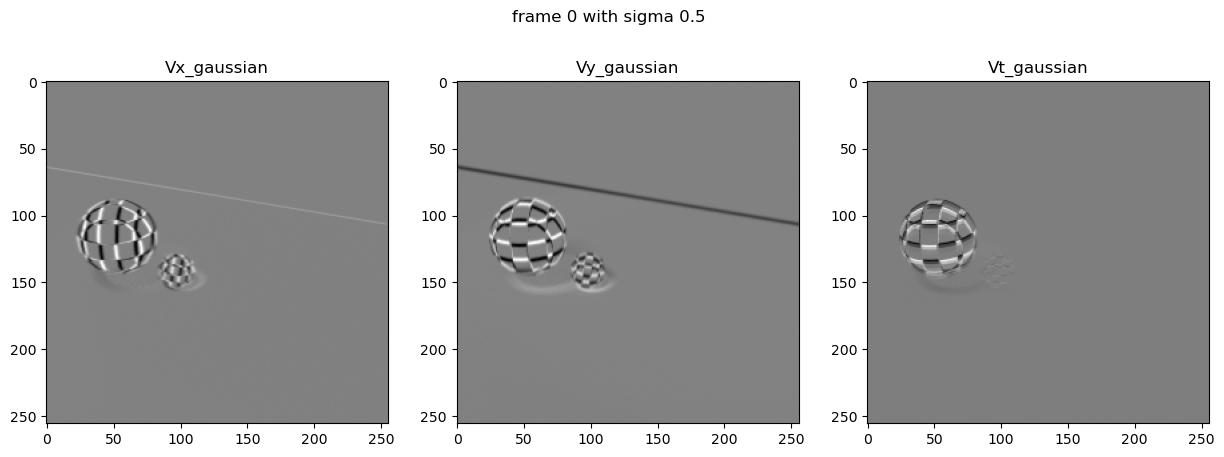

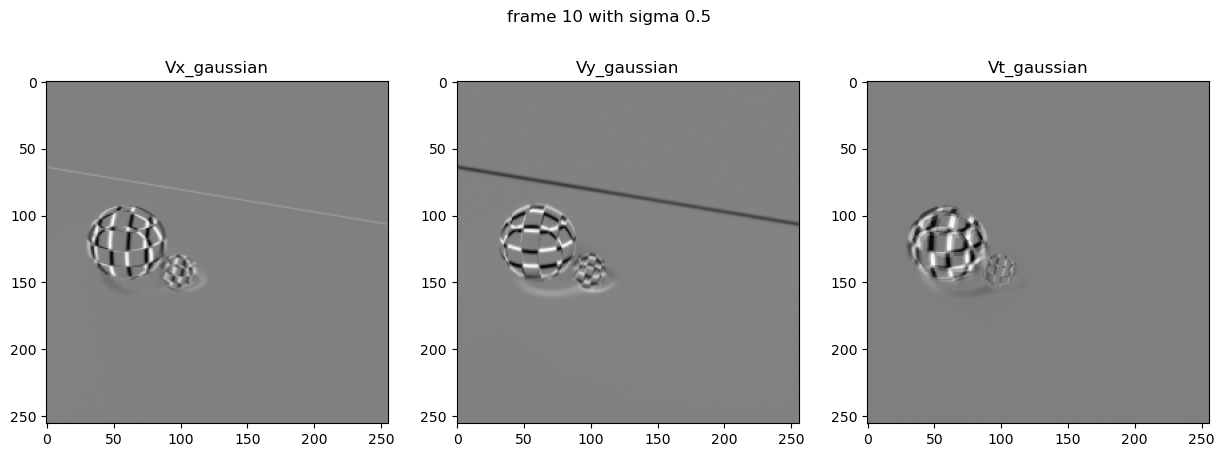

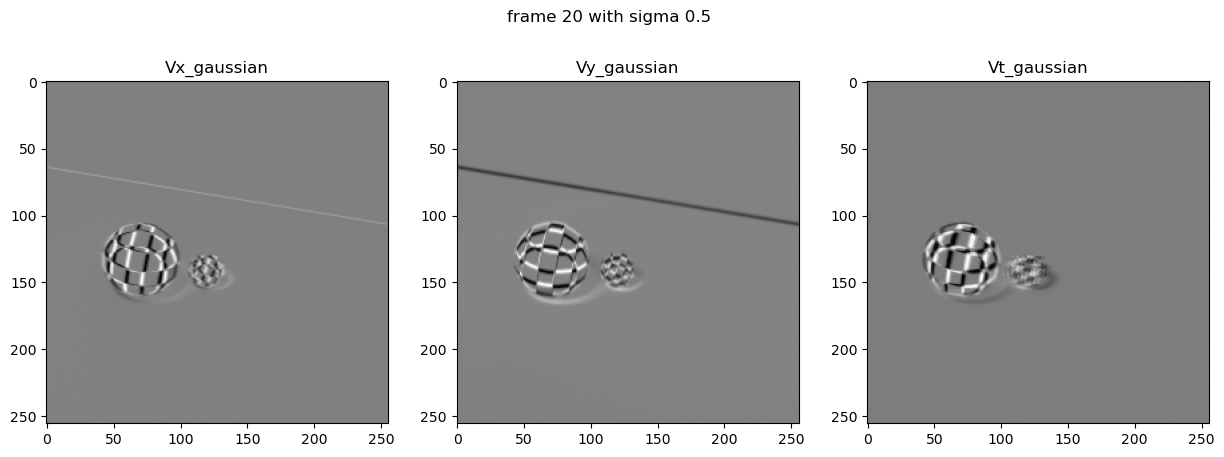

In [14]:
# Select some images
indexes = [0,10,20]
sigma = 0.5

for i in indexes:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.title('frame {}'.format(i))
    ax[0].imshow(Vx_gaussian[:, :, i], cmap='gray')
    ax[0].set_title('Vx_gaussian')
    ax[1].imshow(Vy_gaussian[:, :, i], cmap='gray')
    ax[1].set_title('Vy_gaussian')
    ax[2].imshow(Vt_gaussian[:, :, i], cmap='gray')
    ax[2].set_title('Vt_gaussian')
    fig.suptitle('frame {} with sigma {}'.format(i, sigma))
    plt.show()

In [15]:
gaussian_V.shape

(256, 256, 64)

In [16]:
# # illustrate gaussian_V in different axes
# %matplotlib qt
# for t in range(64):
#     plt.imshow(Vx_gaussian[:,:,t], cmap='gray')
#     plt.pause(0.1)
# %matplotlib inline

## Problem 3.1 - Local and low level solution:

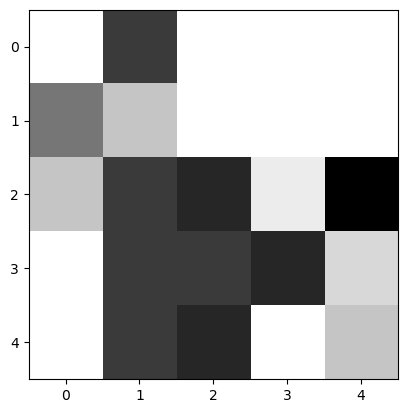

In [17]:
x,y,t = [10,10,10]
# N * N is the size of the region
N = 5
n = int((N-1)//2)
im = ims[t]
x_lower, x_upper = np.maximum(0, x-n), np.minimum(im.shape[0], x+n+1)
y_lower, y_upper = np.maximum(0, y-n), np.minimum(im.shape[1], y+n+1)

plt.imshow(im[x_lower:x_upper, y_lower:y_upper],cmap='gray')
plt.show()

In [18]:
Vx_col = Vx_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
Vy_col = Vy_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
A = np.hstack([Vx_col, Vy_col])
b = -Vt_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
A.shape, b.shape

((25, 2), (25, 1))

[[-0.16848622]
 [-0.18903646]]


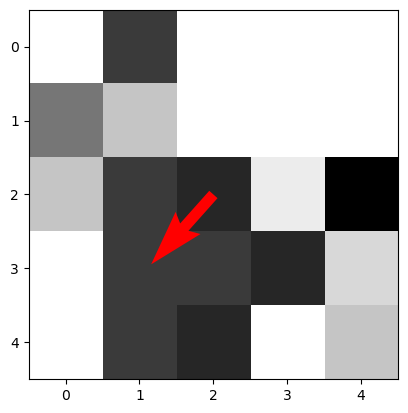

In [19]:
dp = np.linalg.lstsq(A, b, rcond=None)[0]
print(dp)
plt.imshow(im[x_lower:x_upper, y_lower:y_upper], cmap='gray')
plt.quiver(x-x_lower,y-y_lower,dp[0, 0],dp[1, 0], color='r', scale=1, width=.03)
plt.show()

In [20]:
## choose kernel size
N = 5
n = int((N-1)//2)
step_size = 1
t = 1

im = ims[t]
dps_image = np.empty((2, V.shape[0], V.shape[1]))
for x in range(0,V.shape[0],step_size):
    for y in range(0,V.shape[1],step_size):
        x_lower, x_upper = np.maximum(0, x-n), np.minimum(im.shape[0], x+n+1)
        y_lower, y_upper = np.maximum(0, y-n), np.minimum(im.shape[1], y+n+1)
        Vx_col = Vx_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
        Vy_col = Vy_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
        A = np.hstack([Vx_col, Vy_col])
        b = -Vt_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
        dp = np.linalg.lstsq(A, b, rcond=None)[0]
        dps_image[:,x,y] = dp[:,0]

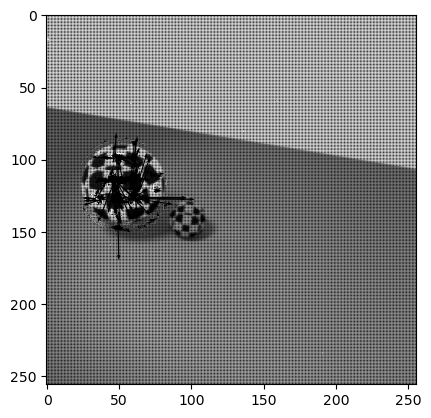

In [21]:
plt.imshow(im, cmap='gray')
X, Y = np.meshgrid(np.arange(0, im.shape[0], step_size), np.arange(0, im.shape[1], step_size))
plt.quiver(Y, X, dps_image[1,X,Y], dps_image[0,X,Y], scale=500, width=.003)

In [22]:
# Optical flow on all images
string = input("It might take a long time to run this part... write \"y\" if you insist:")
if string == "y":
    ## choose kernel size
    N = 5
    n = int((N-1)//2)
    step_size = 1
    t = 1

    dps_images = np.empty((2, V.shape[0], V.shape[1], V.shape[2]))
    for t in range(V.shape[2]):
        im = ims[t]
        dps_image = np.empty((2, V.shape[0], V.shape[1]))
        for x in range(0,V.shape[0],step_size):
            for y in range(0,V.shape[1],step_size):
                x_lower, x_upper = np.maximum(0, x-n), np.minimum(im.shape[0], x+n+1)
                y_lower, y_upper = np.maximum(0, y-n), np.minimum(im.shape[1], y+n+1)
                Vx_col = Vx_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
                Vy_col = Vy_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
                A = np.hstack([Vx_col, Vy_col])
                b = -Vt_gaussian[x_lower:x_upper, y_lower:y_upper, t].reshape(-1,1)
                dp = np.linalg.lstsq(A, b, rcond=None)[0]
                dps_image[:,x,y] = dp[:,0]
        dps_images[:,:,:,t] = dps_image
        print(t, end=' ')
    np.save("toy.npy", dps_images)



0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 

In [23]:
# plot without filtering out noises
# dps_images = np.load("array.npy")
# X, Y = np.meshgrid(np.arange(0, im.shape[0], step_size), np.arange(0, im.shape[1], step_size))
# %matplotlib qt
# for t in range(V.shape[2]):
#     # plt.imshow(V[:,:,t], cmap='gray')
#     plt.quiver(Y, X, dps_images[1,X,Y,t], dps_images[0,X,Y,t], color='r', scale=500, width=.003)
#     plt.pause(0.1)
#     plt.clf()
# %matplotlib inline

In [24]:
# Filter out noises
dps_images = np.load("toy.npy")
dps_images_filtered = dps_images.copy()
for x in range(0,V.shape[0],step_size):
  for y in range(0,V.shape[1],step_size):
        for t in range(V.shape[2]):
            ## filter out arrows with small magnitude (<= 5)
            if np.linalg.norm(dps_images_filtered[:,x,y,t]) <= 5:
                dps_images_filtered[:,x,y,t] = np.zeros(2)
np.save("toy_filtered.npy", dps_images_filtered)

In [25]:
# plot...
dps_images_filtered = np.load("toy_filtered.npy")
step_size = 2
X, Y = np.meshgrid(np.arange(0, V.shape[0], step_size), np.arange(0, V.shape[1], step_size))
%matplotlib qt
for t in range(V.shape[2]):
    plt.imshow(ims_with_color[t])
    plt.quiver(Y, X, dps_images_filtered[1,X,Y,t], dps_images_filtered[0,X,Y,t], scale=500, width=.003)
    plt.pause(0.1)
    plt.clf()
%matplotlib inline

In [26]:
## Appendix, see distribution of arrows' length
plt.hist(np.linalg.norm(dps_images, axis=0).flatten(), bins=100, range=(0, 5))

(array([3.51239e+05, 5.55598e+05, 6.32095e+05, 5.86514e+05, 4.88836e+05,
        3.79862e+05, 2.81945e+05, 2.03544e+05, 1.44210e+05, 1.01500e+05,
        7.16440e+04, 5.15670e+04, 3.83250e+04, 3.02200e+04, 2.47940e+04,
        2.14270e+04, 1.90440e+04, 1.74970e+04, 1.62620e+04, 1.55290e+04,
        1.42100e+04, 1.23530e+04, 1.09300e+04, 9.26500e+03, 7.80900e+03,
        6.68300e+03, 5.83400e+03, 5.17400e+03, 4.45900e+03, 4.04000e+03,
        3.80100e+03, 3.43900e+03, 3.23900e+03, 2.93500e+03, 2.80800e+03,
        2.57400e+03, 2.29000e+03, 2.18900e+03, 2.11800e+03, 1.93200e+03,
        1.89600e+03, 1.81100e+03, 1.71000e+03, 1.58400e+03, 1.50300e+03,
        1.44800e+03, 1.31900e+03, 1.29100e+03, 1.11800e+03, 1.10300e+03,
        1.04500e+03, 1.05100e+03, 9.34000e+02, 9.27000e+02, 8.86000e+02,
        8.55000e+02, 8.29000e+02, 7.27000e+02, 7.21000e+02, 6.48000e+02,
        6.17000e+02, 6.52000e+02, 5.50000e+02, 5.83000e+02, 5.12000e+02,
        5.14000e+02, 4.58000e+02, 4.63000e+02, 4.37

---

In [27]:
# Not important down here.

In [28]:
# import av
# container = av.open(r"C:\Users\ivanf\OneDrive\VID_20240206_222634.mp4")
# 
# for frame in container.decode(video=0):
#     frame.to_image().save('My-own/videoframe-%04d.png' % frame.index)

In [29]:
# paper_pngs = glob.glob('videoframe-*.png')
# # make image list
# ims = []
# for i in paper_pngs:
#     ims.append(skimage.color.rgb2gray(plt.imread(i)))
# 
# # make image array
# V = np.dstack(ims)
# V.shape
# %matplotlib inline
# plt.imshow(ims[20], cmap='gray')
# plt.show()
# plt.imshow(gaussian_V[:,:,20], cmap='gray')
# plt.show()
# # Gaussian filter
# sigma = 0.5
# gaussian_V = scipy.ndimage.gaussian_filter(V, sigma, order=1)
# %matplotlib qt
# # for i in range(gaussian_V.shape[2]):
# #     plt.imshow(gaussian_V[:,:,i], cmap='gray')
# #     plt.pause(0.1)
# %matplotlib inline
# Vx_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=0)
# Vy_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=1)
# Vt_gaussian = scipy.ndimage.gaussian_filter(V, sigma, order=1, axes=2)
# Vx_gaussian.shape, Vy_gaussian.shape, Vt_gaussian.shape
# %matplotlib qt
# for i in range(70,100):
#     plt.imshow(gaussian_V[:,:,i], cmap='gray')
#     plt.pause(0.1)
# %matplotlib inline
# for i in range(gaussian_V.shape[2]):
#     plt.imshow(gaussian_V[:,:,i], cmap='gray')
#     plt.pause(0.1)